# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [33]:
!pip install numpy pandas

14536.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [34]:
import numpy as np
import pandas as pd

# Reading the CSV file
df = pd.read_csv('/Users/calebkim7/wrangling_assignment/data/airbnb_hw.csv')

# Cleaning the Price variable
df['Price_cleaned'] = df['Price'].str.replace('$', '', regex=False)
df['Price_cleaned'] = df['Price_cleaned'].str.replace(',', '', regex=False)
df['Price_cleaned'] = pd.to_numeric(df['Price_cleaned'], errors='coerce')

# Counting the missing values
missing_values = df['Price_cleaned'].isna().sum()

print(f"Number of missing values after cleaning: {missing_values}")

Number of missing values after cleaning: 0


1. In order to clean the Price variable we first look at the values. We can see that the numbers are actually strings. So, we first drop the commas for numbers that are over 999. After that, we can convert the strings to integers. We end of with no missing or null values.

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

In [35]:
import numpy as np
import pandas as pd

# Reading the CSV file
df = pd.read_csv('/Users/calebkim7/wrangling_assignment/data/mn_police_use_of_force.csv')

# Cleaning the subject_injury variable
df['subject_injury_clean'] = df['subject_injury'].fillna('Missing')
df['subject_injury_clean'] = df['subject_injury_clean'].replace({'Y': 'Yes', 'N': 'No'})

# Calculating the proportion of the missing values
missing_proportion = (df['subject_injury'].isna().sum() / len(df)) * 100

print(f"Proportion of the missing values in the subject_injury variable: {missing_proportion:.2f}%")

# Calculating the raw counts
cross_tab_counts = pd.crosstab(df['force_type'], df['subject_injury_clean'])

print("\nCross-tabulation of the subject_injury variable and the force_type variable in count:")
print(cross_tab_counts)

# Cross-tabulating the cleaned subject_injury variable with the force_type variable
cross_tab = pd.crosstab(df['force_type'], df['subject_injury_clean'], normalize='index')

print("\nCross-tabulation of the subject_injury variable and the force_type variable in percentage:")
print(100 * cross_tab)

Proportion of the missing values in the subject_injury variable: 76.19%

Cross-tabulation of the subject_injury variable and the force_type variable in count:
subject_injury_clean         Missing    No   Yes
force_type                                      
Baton                              2     0     2
Bodily Force                    7051  1093  1286
Chemical Irritant               1421   131    41
Firearm                            0     2     0
Gun Point Display                 27    33    44
Improvised Weapon                 74    34    40
Less Lethal                       87     0     0
Less Lethal Projectile             0     1     2
Maximal Restraint Technique      170     0     0
Police K9 Bite                    31     2    44
Taser                            985   150   172

Cross-tabulation of the subject_injury variable and the force_type variable in percentage:
subject_injury_clean            Missing          No        Yes
force_type                                       

The actual quality of the data can be questioned. This is because there should be a concern due to the proportion of missing values in teh subject injury variable being high at 76.19%. A possible cause could be due to a mistake during data collection. The most frequently utilized type of force can be observed to be Bodily Force. Another pattern is that some forces have very little data like Baton, Firearm, and Less Lethal Projectile. Other forces are complteely missing including Less Lethal and Maximal Retraint Technique. In conclusion, the missing data makes the subject_injury column questionable as it could be unreliable data.

3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [36]:
!pip install pyarrow
!pip install fastparquet

14542.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


14548.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [37]:
# Reading the data
df = pd.read_parquet('/Users/calebkim7/wrangling_assignment/data/justice_data.parquet', 
                     engine='fastparquet')

# Converting to numeric and coercing non-numeric values to NaN
df['WhetherDefendantWasReleasedPretrial'] = pd.to_numeric(df['WhetherDefendantWasReleasedPretrial'], errors='coerce')

# Replacing NaN values with np.nan
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace({np.nan: np.nan})

# Keeping 0, 1, and np.nan values
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].where(df['WhetherDefendantWasReleasedPretrial'].isin([0, 1]), np.nan)

print(df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [38]:
# Reading the data
df = pd.read_parquet('/Users/calebkim7/wrangling_assignment/data/justice_data.parquet',
                     engine='fastparquet')

# Converting to numeric and coercing errors to NaN
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

# Replacing 0 with NaN where the SentenceType is not Time to serve
mask = (df['SentenceTypeAllChargesAtConvictionInContactEvent'] != 'Time to serve') & (df['ImposedSentenceAllChargeInContactEvent'] == 0)
df.loc[mask, 'ImposedSentenceAllChargeInContactEvent'] = np.nan

# Replacing the negative values with NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].where(df['ImposedSentenceAllChargeInContactEvent'] >= 0, np.nan)

# Setting a cap for unreasonably high values at 40000 days
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].clip(upper=40000)

4. I converted the values from strings to numerics. Then I replaced 0 with NaN. This is because a sentence cannot be 0 days. After that, I replaced the negative values also with NaN as negative values do not make sense either. Finally, I set a cap of 40000 days because it is unrealistic and unreasonable for the values to be that high.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [40]:
!pip install xlrd==2.0.1

14748.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.

In [41]:
df = pd.read_excel('/Users/calebkim7/wrangling_assignment/data/GSAF5.xls')

2. Drop any columns that do not contain data.

In [42]:
df = df.drop(columns=[col for col in df.columns if col.startswith('Unnamed:')])

print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')


3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [53]:
# Converting Year to numeric and coercing the errors to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filtering the rows since 1940
df_filtered = df[df['Year'] >= 1940]

# Obtaining the count for each year
year_counts = df_filtered['Year'].value_counts().sort_index()

pd.set_option("display.max_rows", None) 
print(year_counts)

Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
1945.0     16
1946.0     26
1947.0     30
1948.0     29
1949.0     31
1950.0     43
1951.0     32
1952.0     29
1953.0     36
1954.0     45
1955.0     43
1956.0     51
1957.0     41
1958.0     54
1959.0     93
1960.0     93
1961.0     78
1962.0     86
1963.0     61
1964.0     66
1965.0     51
1966.0     58
1967.0     48
1968.0     47
1969.0     30
1970.0     42
1971.0     30
1972.0     36
1973.0     27
1974.0     39
1975.0     49
1976.0     39
1977.0     26
1978.0     26
1979.0     25
1980.0     36
1981.0     49
1982.0     42
1983.0     50
1984.0     41
1985.0     37
1986.0     39
1987.0     35
1988.0     56
1989.0     53
1990.0     39
1991.0     39
1992.0     56
1993.0     56
1994.0     57
1995.0     76
1996.0     61
1997.0     57
1998.0     65
1999.0     66
2000.0     97
2001.0     92
2002.0     88
2003.0     92
2004.0     92
2005.0    103
2006.0    103
2007.0    113
2008.0    122
2009.0    120
2010.0    101
2

3. The range of values look to be overall increasing as time passes. The range of values seems to be between 1 and 143. 

In [45]:
!pip install matplotlib

15076.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


4. Clean the Age variable and make a histogram of the ages of the victims.

<Axes: >

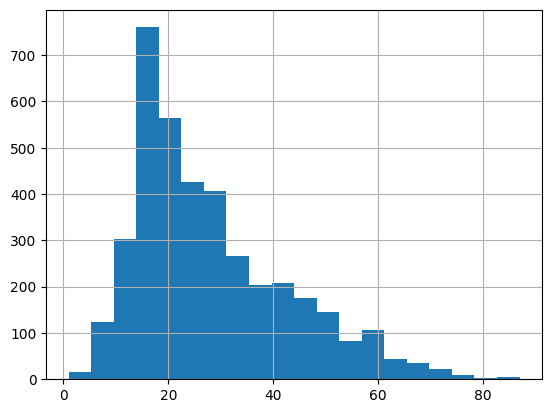

In [46]:
# Converting the Age to numeric and coercing the errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Creating a histogram of ages
df['Age'].hist(bins=20)

5. What proportion of victims are male?

In [47]:
# Calculating proportion victims that are male
male_proportion = (df['Sex'] == 'M').mean()

print(f"Proportion of male victims: {male_proportion:.2f}")

Proportion of male victims: 0.80


6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [49]:
# Cleaning the Type variable column
df['Type'] = df['Type'].apply(lambda x: 'Provoked' if str(x).strip().lower() == 'provoked' else
                                        'Unprovoked' if str(x).strip().lower() == 'unprovoked' else
                                        'Unknown')

print(df['Type'].unique())

# Calculating the proportion of unprovoked attacks
unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()
print(f"Proportion of the unprovoked attacks: {unprovoked_proportion:.2f}")

['Provoked' 'Unprovoked' 'Unknown']
Proportion of the unprovoked attacks: 0.74


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

In [50]:
# Cleaning the Fatal (Y/N) column
df['Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: 'Y' if str(x).upper().startswith('Y') else
                                                      'N' if str(x).upper().startswith('N') else
                                                      'Unknown')
# Checking the unique values
print(df['Fatal Y/N'].unique())

['N' 'Y' 'Unknown']


8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [ ]:
# Cleaning the Sex column
df['Sex'] = df['Sex'].apply(lambda x: 'Male' if str(x).strip().upper() == 'M' else
                                       'Female' if str(x).strip().upper() == 'F' else
                                       'Other')
# Unprovoked attacks by sex
unprovoked_by_gender = df[df['Type'] == 'Unprovoked']['Sex'].value_counts(normalize=True)
print("Proportion of unprovoked attacks by gender:")
print(unprovoked_by_gender)

# Fatality rates by sex and the attack type
fatality_by_type = df.groupby('Type')['Fatal Y/N'].value_counts(normalize=True).unstack()
fatality_by_gender = df.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack()

print("\nFatality rates by sex:")
print(fatality_by_gender)

print("\nFatality rates by the attack type:")
print(fatality_by_type)

Proportion of unprovoked attacks by gender:
Sex
Male      0.836059
Female    0.131422
Other     0.032519
Name: proportion, dtype: float64

Fatality rates by the attack type:
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.956318  0.010920  0.032761
Unknown     0.821429  0.011628  0.166944
Unprovoked  0.744660  0.012700  0.242640

Fatality rates by sex:
Fatal Y/N         N   Unknown         Y
Sex                                    
Female     0.842432  0.006203  0.151365
Male       0.769639  0.009023  0.221338
Other      0.758562  0.053082  0.188356


According to the data, it shows that unprovoked men have a higher chance of getting attacked than an unprovoked woman. In the case that the attack is provoked, it seems like it would be more fatal. When the victim is male, it seems more likely to be fatal. I feel more scared of sharks now.

9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [52]:
# Cleaning the Species column
df['Species'] = df['Species '].str.lower()

# Counting the attacks by white sharks
white_shark_attacks = df['Species'].str.contains('white').sum()

# Counting the total attacks with the species information
total_attacks_with_species = df['Species'].notna().sum()

# Calculating the proportion
proportion = white_shark_attacks / total_attacks_with_species

print(f"Proportion of attacks by white sharks: {proportion:.2f}")

Proportion of attacks by white sharks: 0.19
